# Dilation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from scipy.misc import imsave
import myutils

In [2]:
def my_dilate(img, mask):
    m,n = img.shape[0:2]
    img_res = np.random.randint(0,1,(m,n))
    for i in range(1, m-1):
        for j in range(1,n-1):
            x = {}
            for k in range(len(mask)):# for i
                for l in range(len(mask[0])): # for j
                    x[(k,l)] = int(img[i-k+1,j-l+1]) and mask[k][l]
            res = 0
            for key in x:
                res = res or x[key]
            img_res[i,j] = res
    return img_res

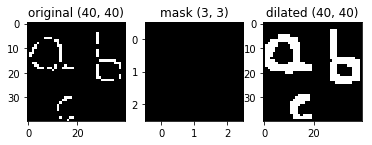

In [3]:
# mask = [[1,1,1],[1,1,1],[1,1,1]]
mask = imread('mask.jpg')
maskBW = myutils.convert_RGB_to_BW(mask)

img = imread('line.jpg')
imgBW = myutils.convert_RGB_to_BW(img)

p = plt.subplot(1,3,1).set_title('original ' + str(imgBW.shape))
plt.imshow(imgBW, cmap='gray')

p = plt.subplot(1,3,2).set_title('mask '+ str(maskBW.shape))
plt.imshow(maskBW, cmap='gray')

dilated_img = my_dilate(imgBW, maskBW)
plt.subplot(1,3,3).set_title('dilated '+ str(dilated_img.shape))
plt.imshow(dilated_img, cmap='gray')


plt.show()
